In [16]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [18]:
from datetime import datetime, time

In [19]:
def timeSlot(row):
    if time(0,1,0) <= row.time() <= time(6,0,0):
        return 1
    elif time(6,1,0) <= row.time() <= time(12,0,0):
        return 2
    elif time(12,1,0) <= row.time() <= time(18,0,0):
        return 3
    else:
        return 4 

[ RQ2 ] Quali sono le fasce orarie con più passeggeri? Imposta le tue fasce orarie e scopri quali sono quelle in cui i taxi guidano il maggior numero di passeggeri nel complesso di New York e ripetono l'analisi per ciascun distretto. Fornisci i risultati attraverso una visualizzazione e commentali.

Come fasce di appartenenza consideriamo quelle di partenza della corsa.
Impostiamo le seguenti fasce orarie:

-Prima fascia (1): [00:01 - 06:00] - notturna 

-Seconda fascia (2): [06:01 - 12:00] - mattina

-Terza fascia (3): [12:01 - 18:00] - pomeridiana

-Quarta fascia (4): [18:01 - 00:00] - serale

In [20]:
df_zone = pd.read_csv('taxi _zone_lookup.csv', usecols=[0,1], encoding = 'ISO-8859-1')

In [21]:
parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df_j= pd.read_csv("C://Users/giuli/Desktop/Algorithmic methods of Data Mining/2 Homework/Dataset taxi 2018/yellow_tripdata_2018-01.csv", usecols = [1,2,3,4,7,8,9,16], parse_dates = parse_dates, encoding = 'ISO-8859-1') 

In [22]:
january = df_j[df_j['tpep_pickup_datetime'].dt.year == 2018]
january = january[january['tpep_pickup_datetime'].dt.month == 1]
january = january[january['tpep_dropoff_datetime'].dt.year == 2018]
january = january[january['tpep_dropoff_datetime'].dt.month <= 2]
january = january[january['passenger_count'] != 0]
january 

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,41,24,2,5.80
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,239,140,2,15.30
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,262,141,1,8.30
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,140,257,2,34.80
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,246,239,1,16.55
5,2018-01-01 00:29:29,2018-01-01 00:32:48,3,0.50,143,143,2,5.80
6,2018-01-01 00:38:08,2018-01-01 00:48:24,2,1.70,50,239,1,12.35
7,2018-01-01 00:49:29,2018-01-01 00:51:53,1,0.70,239,238,1,6.30
8,2018-01-01 00:56:38,2018-01-01 01:01:05,1,1.00,238,24,1,8.50
9,2018-01-01 00:17:04,2018-01-01 00:22:24,1,0.70,170,170,2,6.80


In [23]:
df_join = pd.merge(january,df_zone, how = 'left', left_on=['PULocationID'], right_on=['LocationID'])

In [24]:
df_join['time_slot'] = df_join['tpep_pickup_datetime'].apply(timeSlot)

In [25]:
df_join

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,LocationID,Borough,time_slot
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,41,24,2,5.80,41,Manhattan,1
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,239,140,2,15.30,239,Manhattan,1
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,262,141,1,8.30,262,Manhattan,1
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,140,257,2,34.80,140,Manhattan,1
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,246,239,1,16.55,246,Manhattan,1
5,2018-01-01 00:29:29,2018-01-01 00:32:48,3,0.50,143,143,2,5.80,143,Manhattan,1
6,2018-01-01 00:38:08,2018-01-01 00:48:24,2,1.70,50,239,1,12.35,50,Manhattan,1
7,2018-01-01 00:49:29,2018-01-01 00:51:53,1,0.70,239,238,1,6.30,239,Manhattan,1
8,2018-01-01 00:56:38,2018-01-01 01:01:05,1,1.00,238,24,1,8.50,238,Manhattan,1
9,2018-01-01 00:17:04,2018-01-01 00:22:24,1,0.70,170,170,2,6.80,170,Manhattan,1


Creiamo una colonna all'interno del dataframe df_join con i rispettivi time_slot. 

In [26]:
df_passenger = df_join[['passenger_count','time_slot','Borough']]
df_passenger

,passenger_count,time_slot,Borough
0,1,1,Manhattan
1,1,1,Manhattan
2,2,1,Manhattan
3,1,1,Manhattan
4,2,1,Manhattan
5,3,1,Manhattan
6,2,1,Manhattan
7,1,1,Manhattan
8,1,1,Manhattan
9,1,1,Manhattan


Raggruppo il dataframe df_passenger per time_slot ed eseguo la somma dei passeggeri che ricadono nelle rispettive fasce orarie.

In [27]:
passenger_count = df_passenger.groupby(['time_slot']).passenger_count.sum()
passenger_count

time_slot
1    1404245
2    3437951
3    4563006
4    4669939
Name: passenger_count, dtype: int64

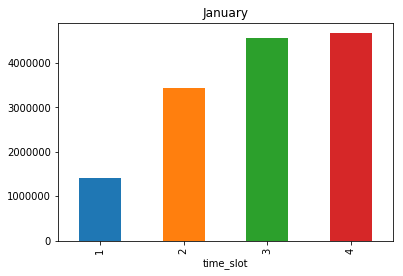

In [28]:
passenger_count.plot.bar(x='time_slot', y ='passenger_count', title = 'January')

In [44]:
passenger_count_borough = df_passenger.groupby(['Borough','time_slot']).passenger_count.sum()
passenger_count_borough

Borough        time_slot
Bronx          1               2466
               2               3573
               3               3195
               4               2270
Brooklyn       1              37953
               2              38504
               3              29973
               4              53391
EWR            1                 51
               2                223
               3                452
               4                144
Manhattan      1            1255091
               2            3159749
               3            4165373
               4            4241555
Queens         1              83929
               2             184172
               3             289544
               4             297705
Staten Island  1                 58
               2                 32
               3                 75
               4                 68
Unknown        1              24697
               2              51698
               3              74394
   

Provo a ridistribuire i passeggeri unknown per fascia

In [51]:
d2 = passenger_count_borough.to_dict()
d3 = {}
for i in d2: 
    if i[1] not in d3: 
        d3[i[1]] = d2[i]
    else: 
        d3[i[1]] += d2[i]
d3

{1: 1404245, 2: 3437951, 3: 4563006, 4: 4669939}

In [52]:
for i in d2:
    d2[i] += round(((d2[i]/(d3[i[1]]-d2[('Unknown', i[1])]))*100)*(d2[('Unknown', i[1])]/100))

d2.pop(('Unknown', 1))
d2.pop(('Unknown', 2))
d2.pop(('Unknown', 3))
d2.pop(('Unknown', 4))

76024

In [53]:
d2

{('Bronx', 1): 2510,
 ('Bronx', 2): 3628,
 ('Bronx', 3): 3248,
 ('Bronx', 4): 2307,
 ('Brooklyn', 1): 38632,
 ('Brooklyn', 2): 39092,
 ('Brooklyn', 3): 30470,
 ('Brooklyn', 4): 54260,
 ('EWR', 1): 52,
 ('EWR', 2): 226,
 ('EWR', 3): 459,
 ('EWR', 4): 146,
 ('Manhattan', 1): 1277560,
 ('Manhattan', 2): 3207989,
 ('Manhattan', 3): 4234410,
 ('Manhattan', 4): 4310605,
 ('Queens', 1): 85432,
 ('Queens', 2): 186984,
 ('Queens', 3): 294343,
 ('Queens', 4): 302551,
 ('Staten Island', 1): 59,
 ('Staten Island', 2): 32,
 ('Staten Island', 3): 76,
 ('Staten Island', 4): 69}

In [55]:
total_passenger_borough = {}
for i in d2: 
    if i[0] not in total_passenger_borough:
        total_passenger_borough[i[0]] = d2[i]
    else: 
         total_passenger_borough[i[0]] += d2[i]

In [56]:
total_passenger_borough

{'Bronx': 11693,
 'Brooklyn': 162454,
 'EWR': 883,
 'Manhattan': 13030564,
 'Queens': 869310,
 'Staten Island': 236}

In [57]:
d_percentage = {}
for i in d2: 
    d_percentage[i] = round((d2[i] / total_passenger_borough[i[0]])*100,1)

In [58]:
d_percentage

{('Bronx', 1): 21.5,
 ('Bronx', 2): 31.0,
 ('Bronx', 3): 27.8,
 ('Bronx', 4): 19.7,
 ('Brooklyn', 1): 23.8,
 ('Brooklyn', 2): 24.1,
 ('Brooklyn', 3): 18.8,
 ('Brooklyn', 4): 33.4,
 ('EWR', 1): 5.9,
 ('EWR', 2): 25.6,
 ('EWR', 3): 52.0,
 ('EWR', 4): 16.5,
 ('Manhattan', 1): 9.8,
 ('Manhattan', 2): 24.6,
 ('Manhattan', 3): 32.5,
 ('Manhattan', 4): 33.1,
 ('Queens', 1): 9.8,
 ('Queens', 2): 21.5,
 ('Queens', 3): 33.9,
 ('Queens', 4): 34.8,
 ('Staten Island', 1): 25.0,
 ('Staten Island', 2): 13.6,
 ('Staten Island', 3): 32.2,
 ('Staten Island', 4): 29.2}

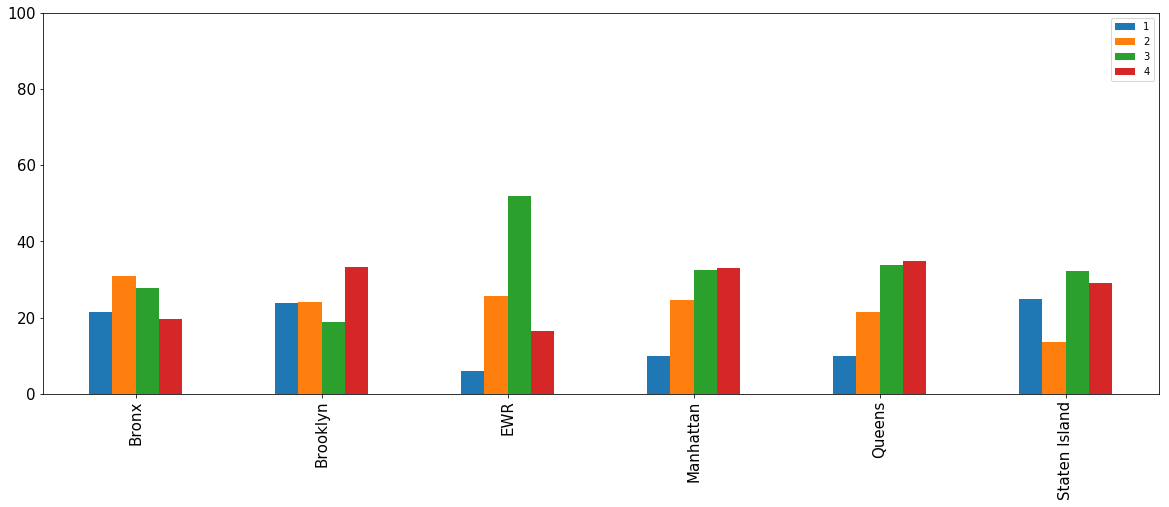

In [65]:
d_percentage = pd.Series(d_percentage)
d_percentage.unstack().plot.bar(figsize=(20,7),fontsize = 15, ylim=[0,100])